In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline

# Iris Dataset

Another dataset that comes with Scikit-learn is the Iris Dataset, which contains data on a few species of Iris flowers.

We can use the data on each species to train our model and predict with species a flower is, based on its features.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Note:
The `target` column, is the encoded names of each species

In [4]:
list(enumerate(iris.target_names))

[(0, 'setosa'), (1, 'versicolor'), (2, 'virginica')]

For, our understanding, we can make another column deconding the target column and showing the species name of that flower.

In [5]:
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# Visualizing feature correlations
Grouping data by `target`, which is the encoded version of `species`.

In [6]:
g = df.groupby('target')

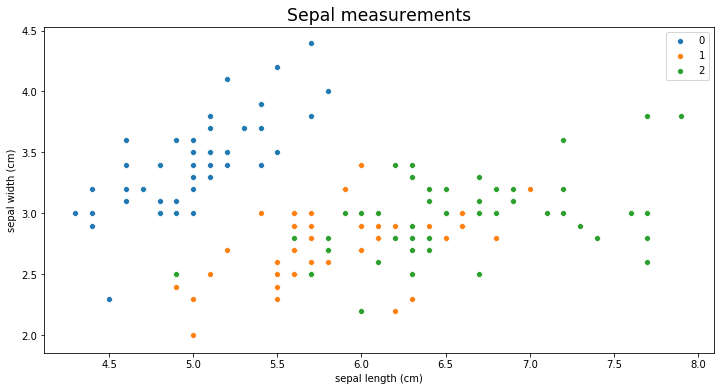

In [7]:
plt.figure(figsize=(12, 6))
plt.title("Sepal measurements", fontsize='xx-large')
for name, data in g:
    sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], label=name)

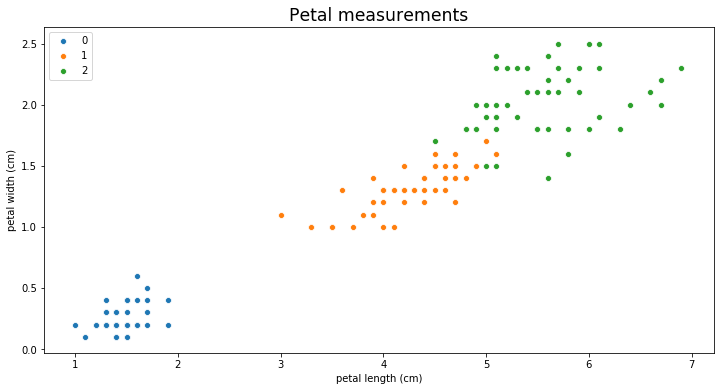

In [8]:
plt.figure(figsize=(12, 6))
plt.title("Petal measurements", fontsize='xx-large')
for name, data in g:
    sns.scatterplot(x=data['petal length (cm)'], y=data['petal width (cm)'], label=name)

# Preparing data

In [9]:
X = df.drop(['target', 'species'], axis='columns')
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [10]:
y = df.target
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: target, dtype: int32

# Splitting data for training and testing

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
len(X_train), len(y_train), len(y_test), len(X_test)

(120, 120, 30, 30)

# Modeling

In [14]:
from sklearn.svm import SVC
lin = SVC(kernel='linear')
rbf = SVC(kernel='rbf')

In [15]:
lin.fit(X_train, y_train)
rbf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Testing accuracy

In [16]:
print("Linear model score :", lin.score(X_test, y_test))
print("RBF model score    :", rbf.score(X_test, y_test))

Linear model score : 1.0
RBF model score    : 1.0
